In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [136]:
placement=pd.read_csv("Job_Placement_Data.csv")
placement.head(10)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


In [137]:
placement_copy=placement.copy()

In [138]:
placement_copy.shape

(215, 13)

In [139]:
placement_copy.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [140]:
placement.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [141]:
placement_copy.drop(['ssc_board','hsc_board'], axis = 1 , inplace = True)


In [157]:
placement_copy.head(10)

,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,M,55.00,49.80,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.00,49.20,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,M,73.00,79.00,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,M,58.00,70.00,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


Text(0.5, 1.0, 'Employability Percentage')

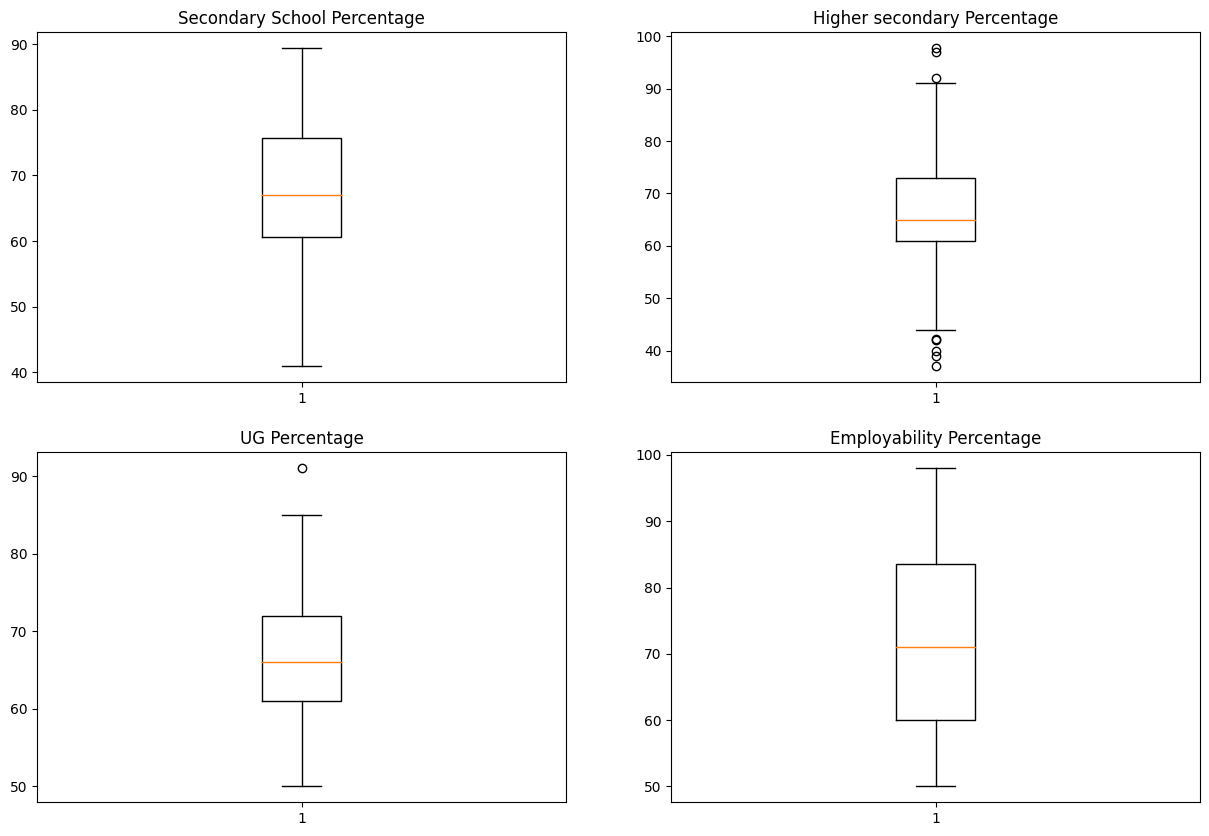

In [143]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['ssc_percentage'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(placement_copy['hsc_percentage'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(placement_copy['degree_percentage'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(placement_copy['emp_test_percentage'])
ax.set_title('Employability Percentage')

In [144]:
Q1 = placement_copy['hsc_percentage'].quantile(0.25)
Q3 = placement_copy['hsc_percentage'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['hsc_percentage'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_percentage']<= Q3+ 1.5*IQR)
placement_filtered= placement_copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x21836716d10>,
 'caps': [<matplotlib.lines.Line2D at 0x21836717250>,
 'boxes': [<matplotlib.lines.Line2D at 0x21836716a70>],
 'medians': [<matplotlib.lines.Line2D at 0x21836717790>],
 'fliers': [<matplotlib.lines.Line2D at 0x21836717a30>],
 'means': []}

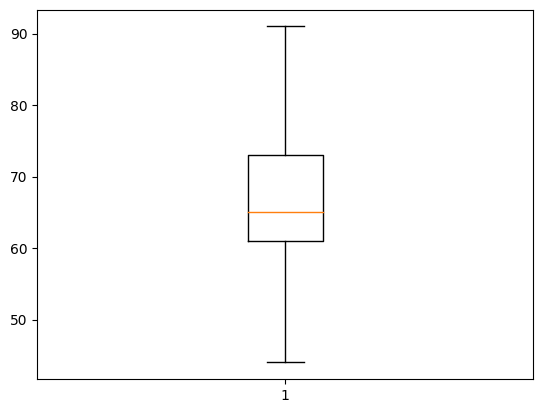

In [145]:
plt.boxplot(placement_filtered['hsc_percentage'])

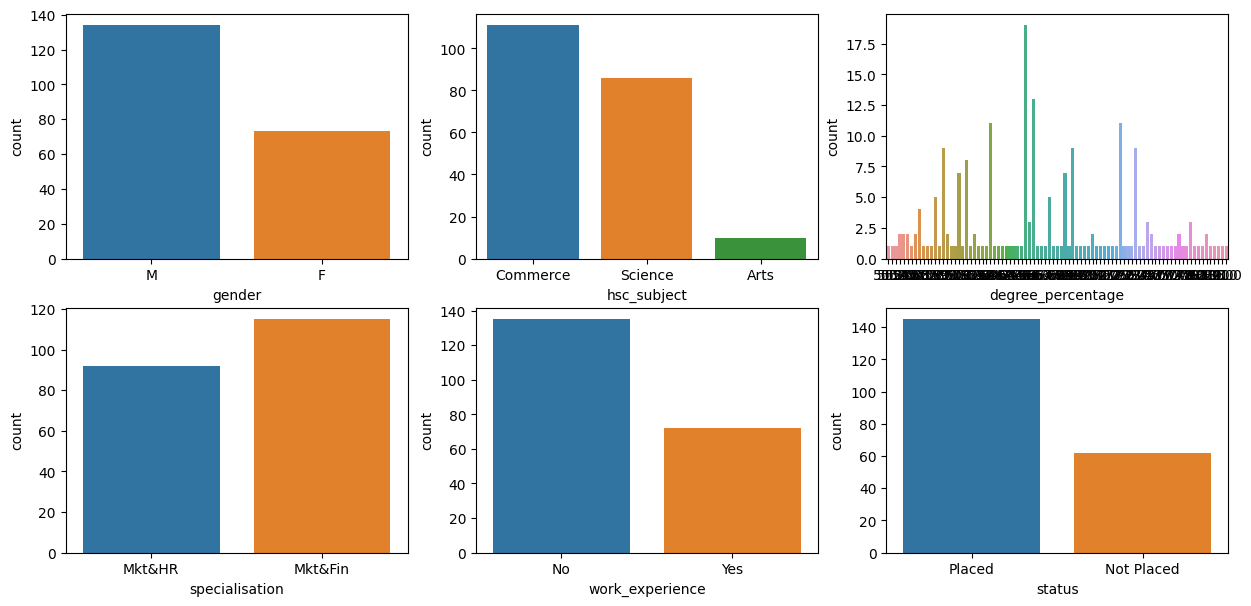

In [146]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = placement_filtered)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_subject' , data = placement_filtered)

plt.subplot(233)
ax = sns.countplot(x= 'degree_percentage' , data = placement_filtered)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = placement_filtered)

plt.subplot(235)
ax = sns.countplot(x= 'work_experience' , data = placement_filtered)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = placement_filtered)


<Axes: xlabel='status', ylabel='Density'>

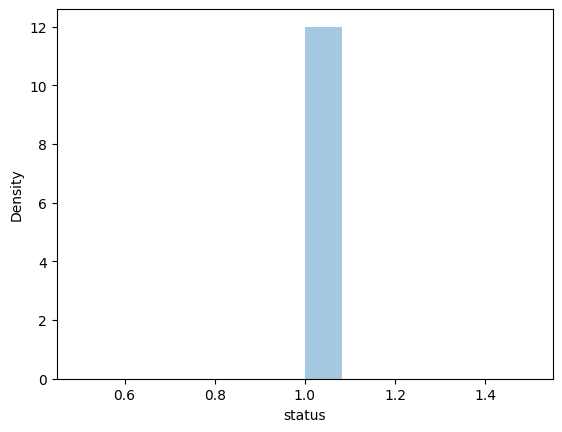

In [155]:
placement_placed = placement_filtered[placement_filtered.status!= 0]
sns.distplot(placement_placed['status'])

In [158]:
import plotly.express as px
px.violin(placement_placed,y="status",x="specialisation",color="gender",box=True,points="all")

In [148]:
 #Label Encoding
import sklearn
from sklearn.preprocessing import LabelEncoder

object_cols= ['gender','work_experience','specialisation','status']

label_encoder = LabelEncoder()

for col in object_cols:
    placement_filtered[col]= label_encoder.fit_transform(placement_filtered[col])
    
placement_filtered.head(10)

,gender,ssc_percentage,hsc_percentage,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.00,1,58.80,1
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.50,0,66.28,1
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.00,0,57.80,1
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.00,1,59.43,0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.80,0,55.50,1
5,1,55.00,49.80,Science,67.25,Sci&Tech,1,55.00,0,51.58,0
6,0,46.00,49.20,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0
7,1,82.00,64.00,Science,66.00,Sci&Tech,1,67.00,0,62.14,1
8,1,73.00,79.00,Commerce,72.00,Comm&Mgmt,0,91.34,0,61.29,1
9,1,58.00,70.00,Commerce,61.00,Comm&Mgmt,0,54.00,0,52.21,0


In [149]:
# One Hot Encoding 
dummy_hsc_subject = pd.get_dummies(placement_filtered['hsc_subject'], prefix = 'dummy')
dummy_undergrad_degree = pd.get_dummies(placement_filtered['undergrad_degree'], prefix = 'dummy')

placement_coded = pd.concat([placement_filtered , dummy_hsc_subject , dummy_undergrad_degree],axis = 1)
placement_coded.drop(['hsc_subject','undergrad_degree'],axis = 1 , inplace = True)
placement_coded.head()

,gender,ssc_percentage,hsc_percentage,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


In [150]:
X = placement_coded.drop(['status'],axis=1)
y = placement_coded.status

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

In [152]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.6, random_state=1)


logreg = LogisticRegression()

logreg.fit(X_train , y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_test , y_test))

0.8192771084337349


In [153]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

dt = dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.7951807228915663


In [154]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(X_train , y_train)
y_pred = rt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))


Accuracy 0.8554216867469879
